In [65]:
#import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Đường dẫn đến tập tin CSV
file_path = 'G:\MC\Telco-Customer-Churn.csv'
# Đọc dữ liệu từ CSV vào DataFrame
df = pd.read_csv(file_path)
# Hiển thị DataFrame trong VS Code
df.head(5)

<>:12: SyntaxWarning: invalid escape sequence '\M'
<>:12: SyntaxWarning: invalid escape sequence '\M'
C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\198544778.py:12: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'G:\MC\Telco-Customer-Churn.csv'


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Tìm hiểu về dữ liệu

In [66]:
#Xem tất cả các cột 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
#Xem kích thước của data
df.shape

(7043, 21)

Kích thước của data là có 7043 dòng và 21 cột

Làm sạch dữ liệu

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
#kiểm tra missing data
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [70]:
#Chuyển đổi kiểu dữ liệu của TotalCharges từ Objects thành float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [71]:
row_null=df[df['TotalCharges'].isnull()]
print(row_null)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [119]:
#Xử lý Total Charge cho các khách hàng bị thiếu bằng giá trị trung bình của tổng chi phí bỏ ra của tất cả khách hàng.
mean_score=df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_score,inplace=True)

C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\1216501234.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_score,inplace=True)


In [73]:
#Kiểm tra lại giá trị null của cột TotalCharges
df['TotalCharges'].isnull().sum()

np.int64(0)

In [74]:
#kiểm tra giá trị trùng lặp
df.duplicated().sum()

np.int64(0)

Tìm giá trị ngoại lai của MonthlyCharges và TotalCharges

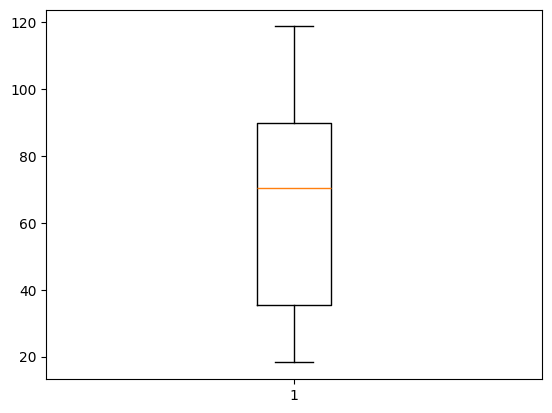

In [75]:
plt.boxplot(df['MonthlyCharges'].values)
plt.show()

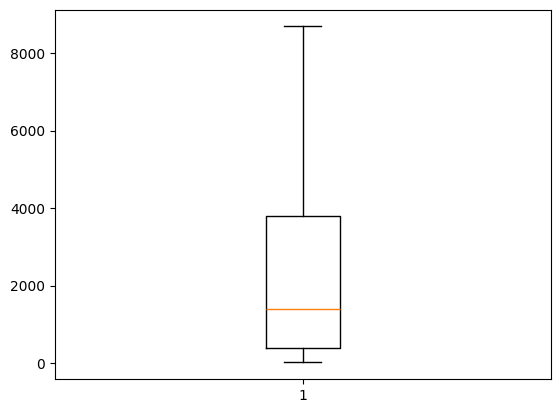

In [76]:
plt.boxplot(df['TotalCharges'].values)
plt.show()

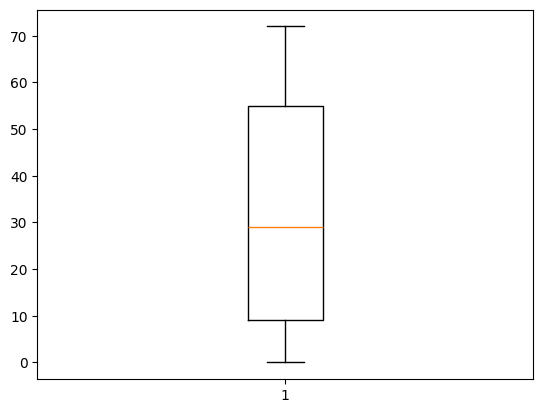

In [77]:
plt.boxplot(df['tenure'].values)
plt.show()

In [78]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Ở 3 thuộc tính đều không có giá trị outlier

TRỰC QUAN HÓA DỮ LIỆU

Gender

In [79]:
so_luong_KH_Gender=df['gender'].value_counts()
so_luong_KH_Gender

gender
Male      3555
Female    3488
Name: count, dtype: int64

C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\3399409788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=so_luong_KH_Gender.index, y=so_luong_KH_Gender.values, palette=['#0066FF','#00CCFF'])


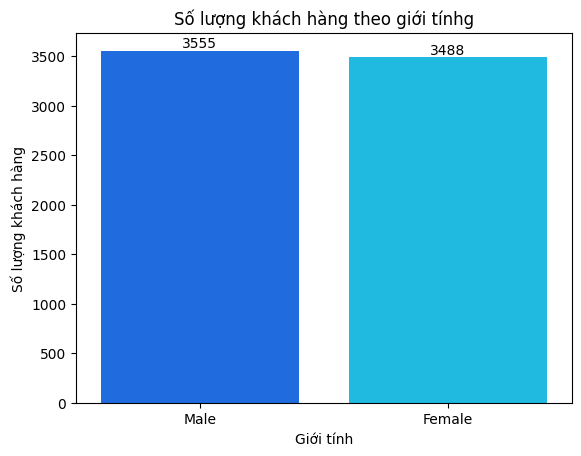

In [80]:
sns.barplot(x=so_luong_KH_Gender.index, y=so_luong_KH_Gender.values, palette=['#0066FF','#00CCFF'])
plt.xlabel("Giới tính")
plt.ylabel("Số lượng khách hàng")
plt.title("Số lượng khách hàng theo giới tínhg")
for i, value in enumerate(so_luong_KH_Gender.values):
    plt.text(i, value+2, f'{value}',ha='center', va='bottom', fontsize=10)
plt.show()

In [81]:
tileloaibo=df['Churn'].value_counts(normalize=True)*100
tileloaibo

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\4063425289.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([tileloaibo[0],100-tileloaibo[0]], labels = ['Không rời bỏ','Rời bỏ'],


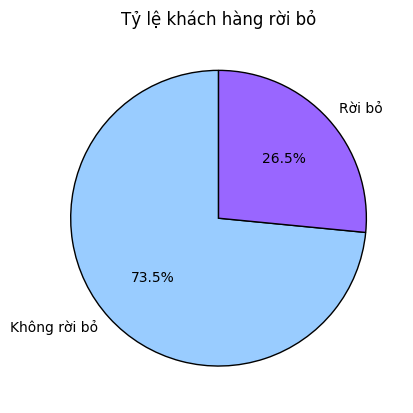

In [82]:
plt.pie([tileloaibo[0],100-tileloaibo[0]], labels = ['Không rời bỏ','Rời bỏ'],
        autopct='%1.1f%%', startangle=90, colors=['#99CCFF', '#9966FF'], wedgeprops={'edgecolor': 'black'})
plt.title("Tỷ lệ khách hàng rời bỏ")
plt.show()

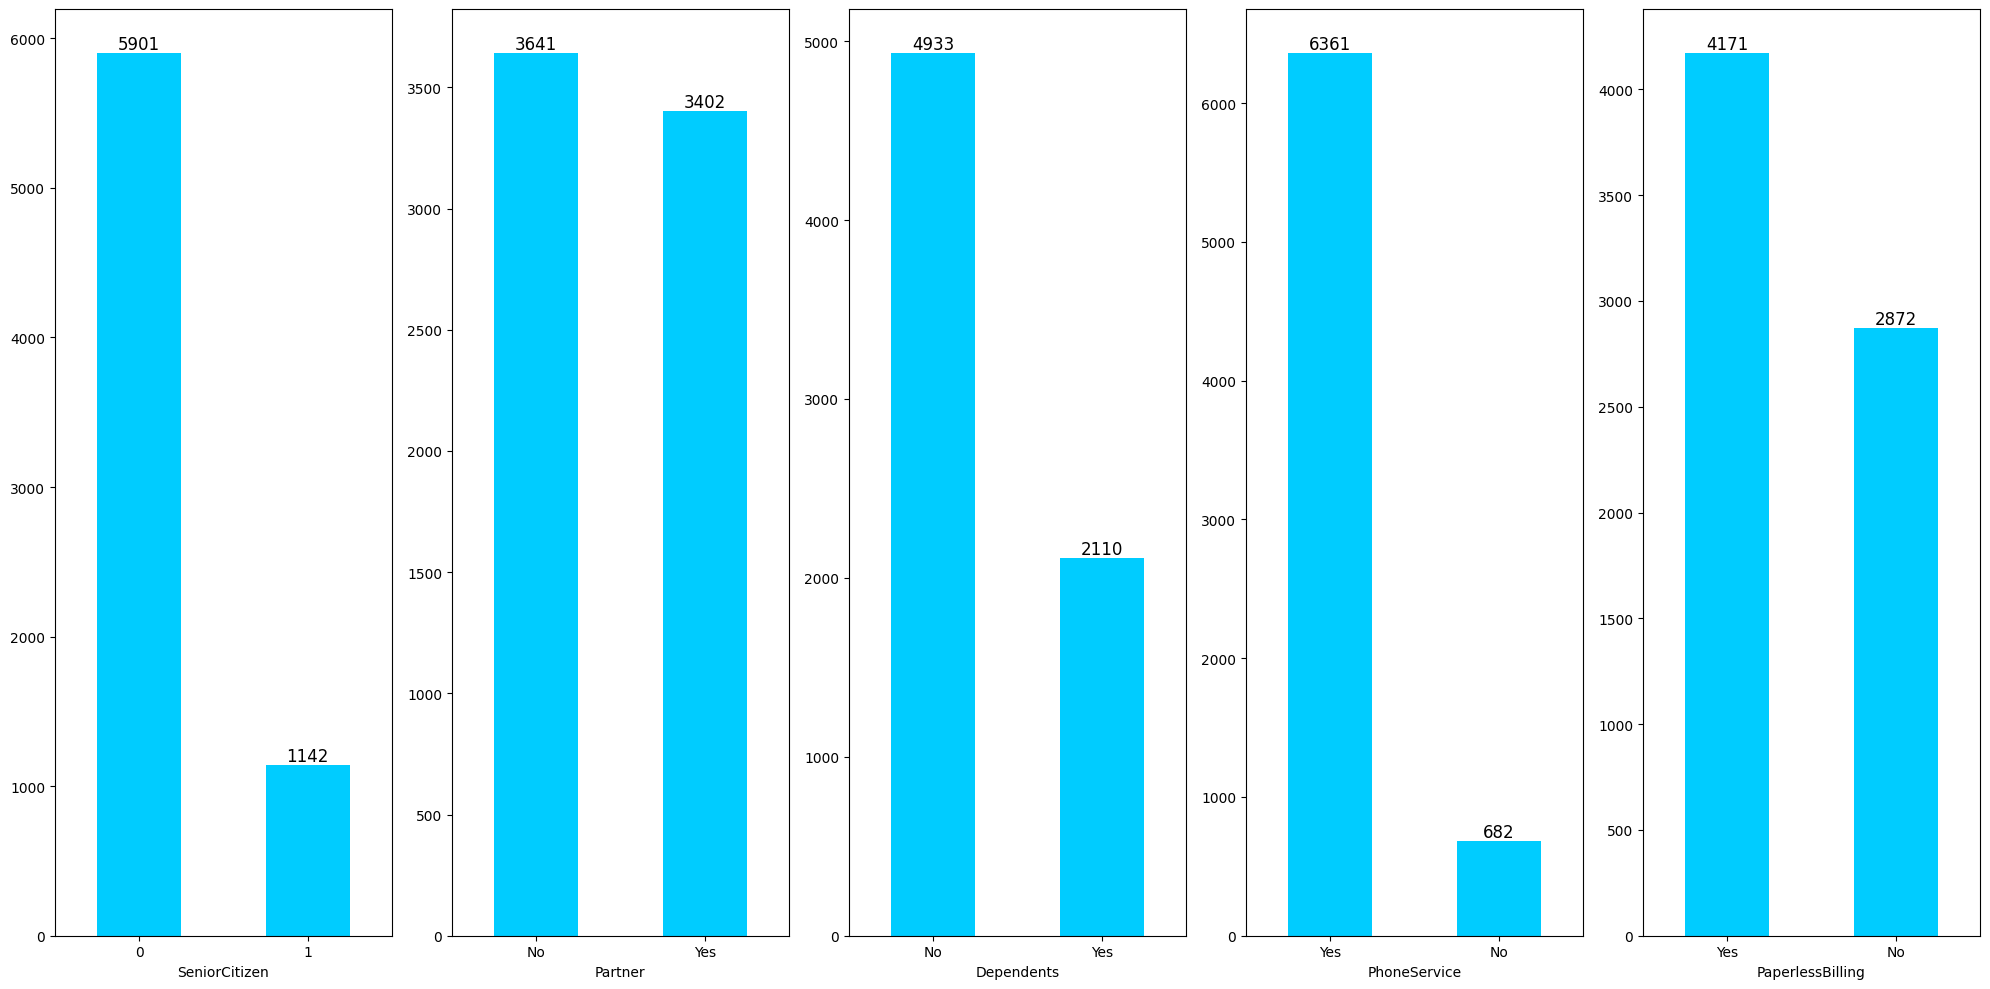

In [83]:
ft = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
fig = plt.figure(figsize=(20, 10))
for i, column in enumerate(ft):
    ax = fig.add_subplot(1, 5, i+1)
    value_counts = df[column].value_counts()  
    value_counts.plot(kind='bar', ax=ax, rot=0, color='#00CCFF')
    for j, value in enumerate(value_counts):
        ax.text(j, value + 0.05, f'{value}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

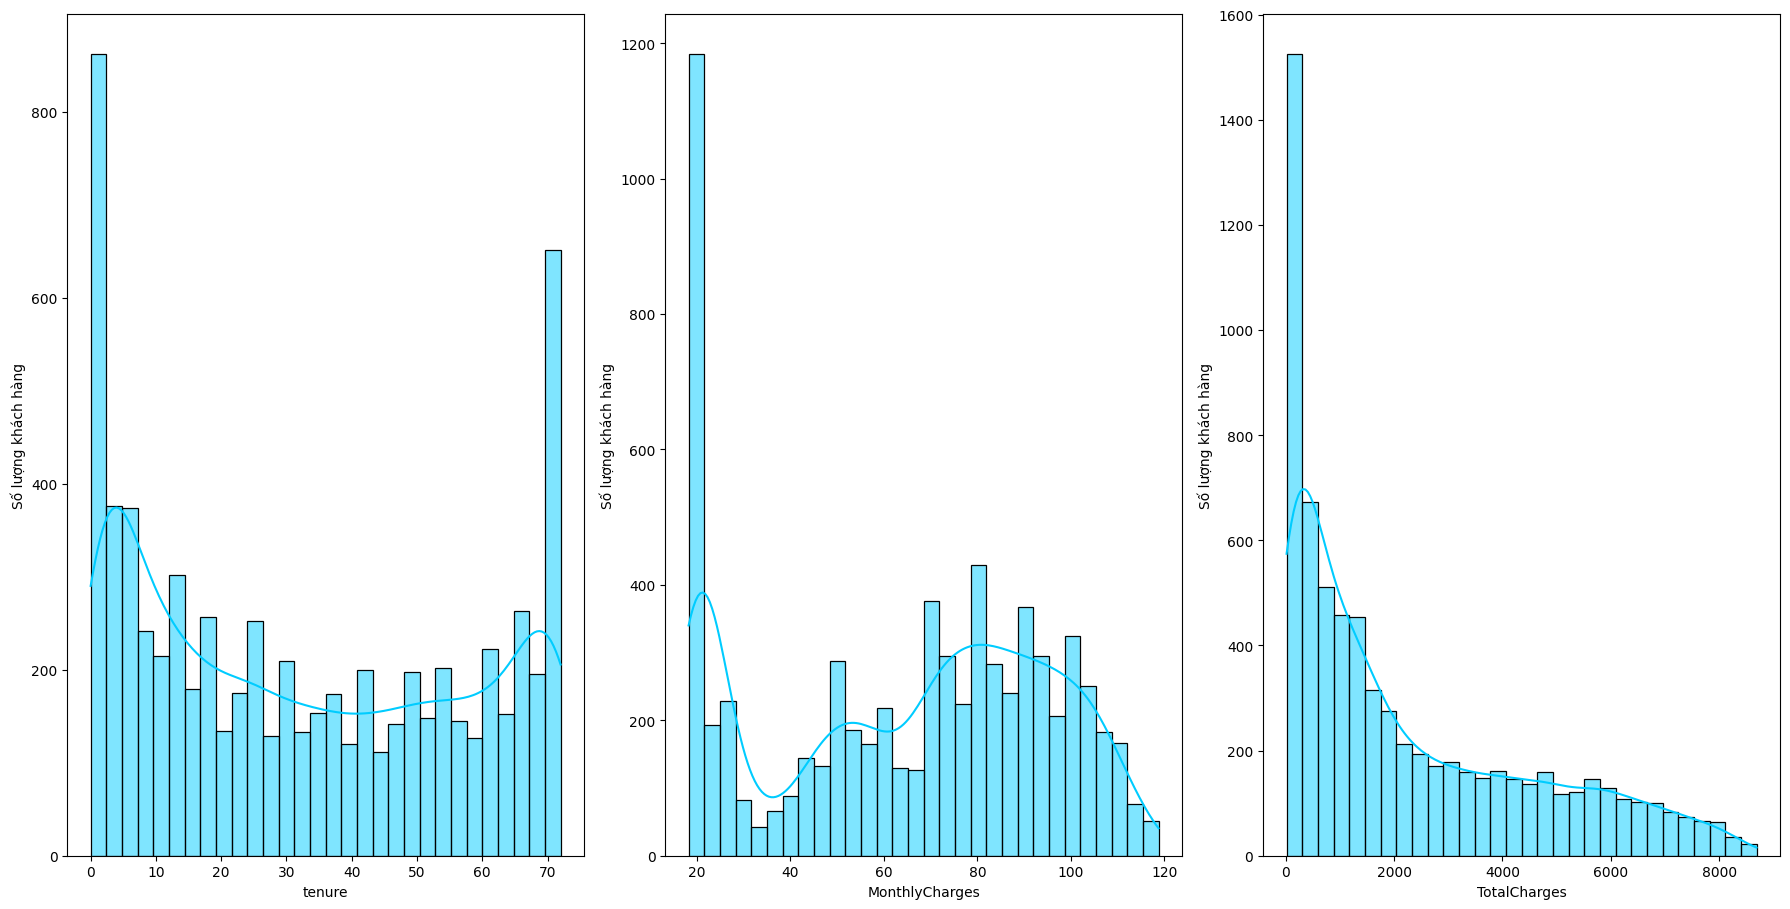

In [84]:
ft1 = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
for i, column in enumerate(ft1):
    ax = axes[i]  
    sns.histplot(df[column], bins=30, kde=True, ax=ax, color= '#00CCFF', edgecolor='black')
    ax.set_xlabel(column)
    ax.set_ylabel('Số lượng khách hàng')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

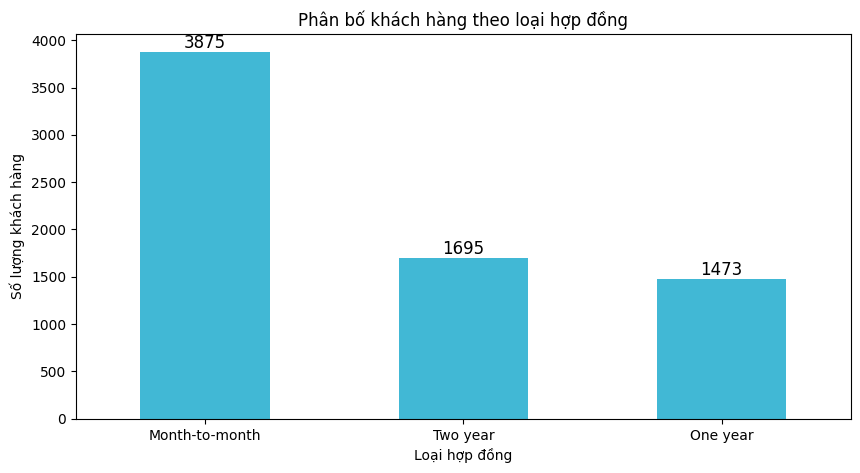

In [85]:
df.Contract.value_counts().plot(kind='bar', figsize=(10,5),color='#41b8d5')
plt.title("Phân bố khách hàng theo loại hợp đồng")
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Loại hợp đồng')
for i in range(len(df.Contract.value_counts())):
     plt.text(i, df.Contract.value_counts().iloc[i] + 0.05,  
             f'{df.Contract.value_counts().iloc[i]}', 
             ha='center', va='bottom', fontsize=12) 
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

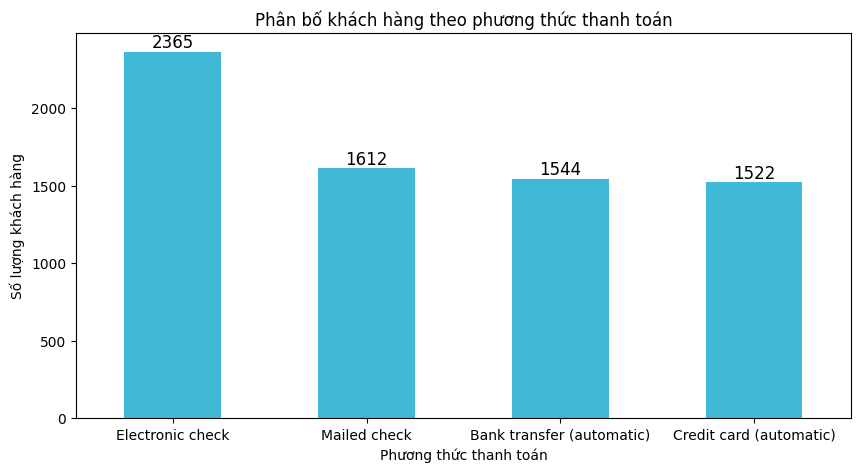

In [86]:
df.PaymentMethod.value_counts().plot(kind='bar', figsize=(10,5),color='#41b8d5')
plt.title("Phân bố khách hàng theo phương thức thanh toán")
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Phương thức thanh toán')
for i in range(len(df.PaymentMethod.value_counts())):
     plt.text(i, df.PaymentMethod.value_counts().iloc[i] + 0.05,  
             f'{df.PaymentMethod.value_counts().iloc[i]}', 
             ha='center', va='bottom', fontsize=12) 
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

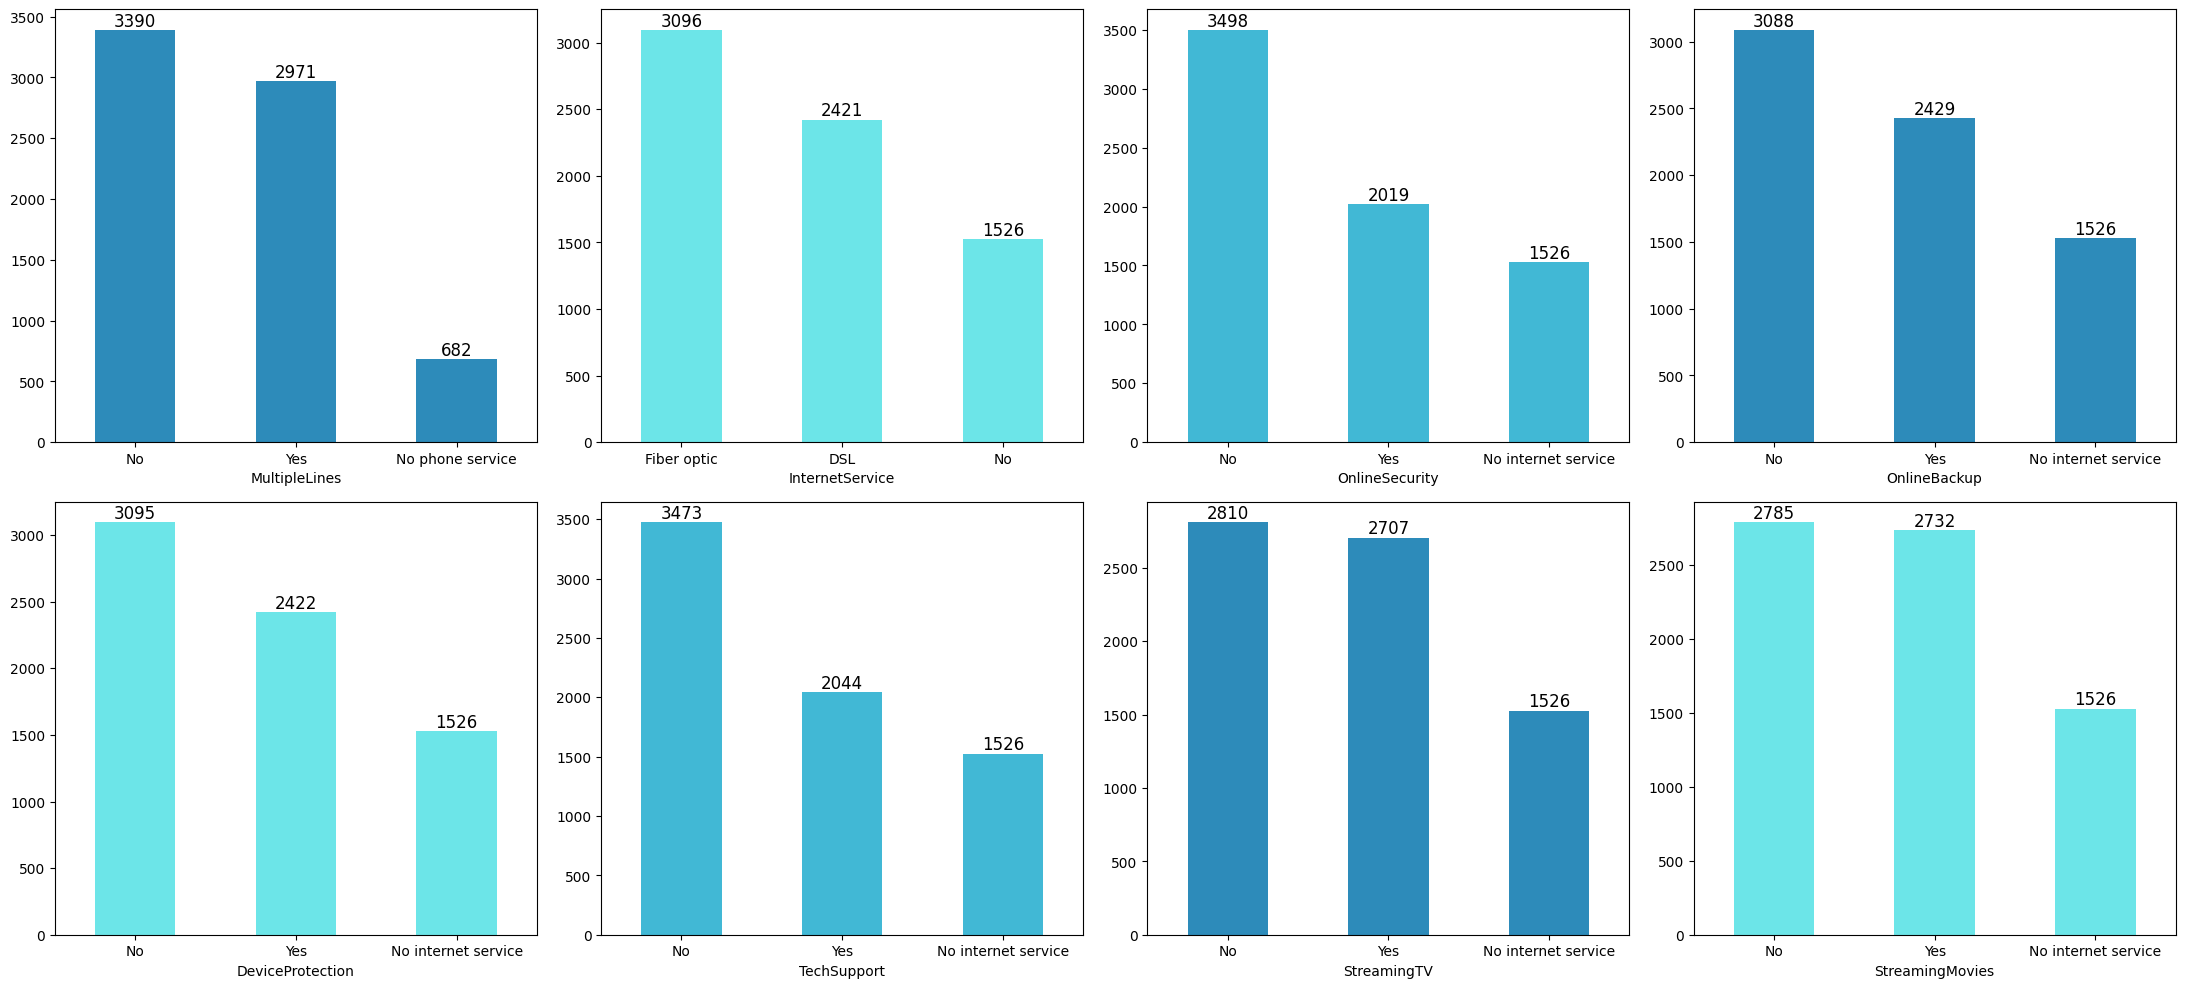

In [87]:
services = ['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
colors = ['#2d8bba', '#6ce5e8', '#41b8d5']
for i, item in enumerate(services):
    ax = axes.flatten()[i] 
    value_counts = df[item].value_counts()  
    color = colors[i % 3]  
    value_counts.plot(kind='bar', ax=ax, rot=0, color=color)
    for j, value in enumerate(value_counts):
        ax.text(j, value + 0.05, f'{value}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Trực quan theo biến mục tiêu

Gender

In [88]:
df[df['Churn'] == 'Yes'].groupby('gender')['Churn'].count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [89]:
tileroibotheogender = df[df['Churn'] == 'Yes'].groupby('gender').size() / df.groupby('gender').size() * 100
tileroibotheogender

gender
Female    26.920872
Male      26.160338
dtype: float64

C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\1758319756.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([tileroibotheogender[0],100-tileroibotheogender[0]],labels=['Rời bỏ','Không rời bỏ'],
C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\1758319756.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([tileroibotheogender[1],100-tileroibotheogender[1]],labels=['Rời bỏ','Không rời bỏ'],


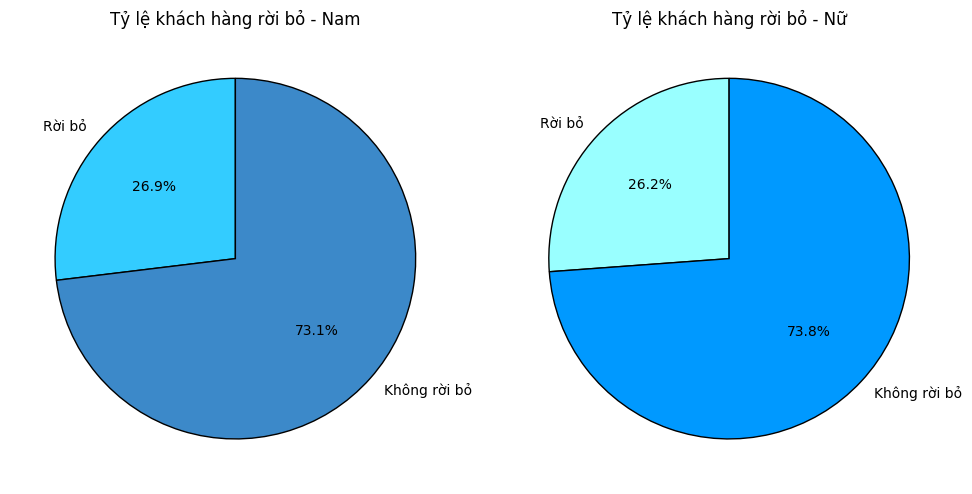

In [90]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.pie([tileroibotheogender[0],100-tileroibotheogender[0]],labels=['Rời bỏ','Không rời bỏ'],
autopct='%1.1f%%', startangle=90, colors=['#33CCFF', '#3c89c9'], wedgeprops={'edgecolor': 'black'})
plt.title("Tỷ lệ khách hàng rời bỏ - Nam")
plt.subplot(1, 2, 2)
plt.pie([tileroibotheogender[1],100-tileroibotheogender[1]],labels=['Rời bỏ','Không rời bỏ'],
autopct='%1.1f%%', startangle=90, colors=['#99FFFF', '#0099FF'], wedgeprops={'edgecolor': 'black'})
plt.title("Tỷ lệ khách hàng rời bỏ - Nữ")
plt.tight_layout()
plt.show()

Contract

In [91]:
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack().rename(columns={0: 'No', 1: 'Yes'})
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


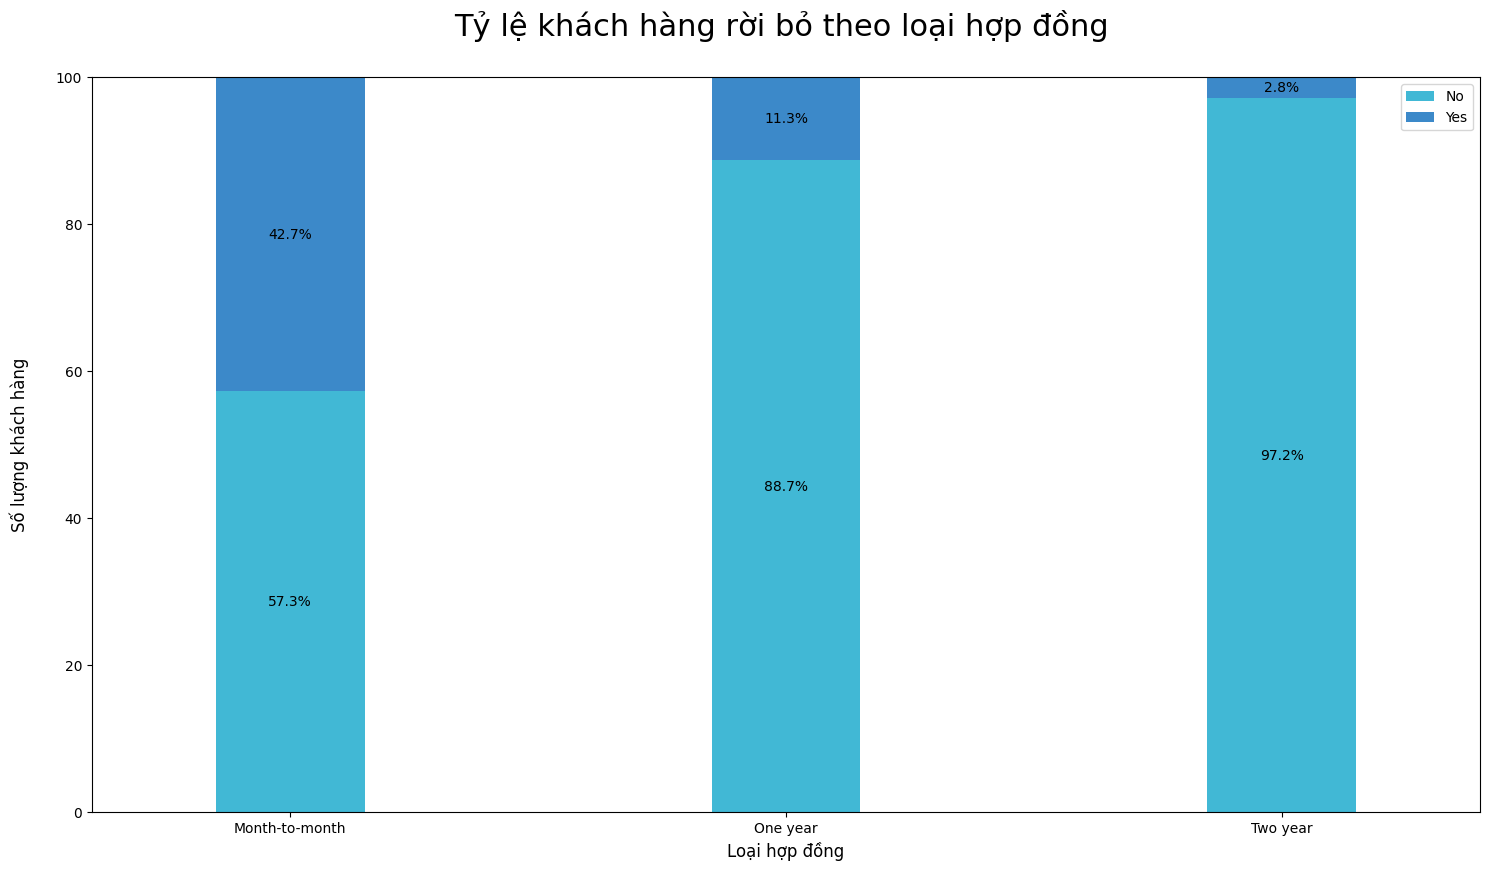

In [92]:
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar', stacked=True, color=['#41b8d5', '#3c89c9'], width=0.3, figsize=(15,10))
plt.ylabel('Số lượng khách hàng\n', fontsize="large")
plt.xlabel('Loại hợp đồng\n', fontsize="large")
plt.title('Tỷ lệ khách hàng rời bỏ theo loại hợp đồng \n', fontsize=22)
# Thiết lập trục y để hiển thị phần trăm (tăng giá trị y lên 100 lần)
ax.set_ylim(0, 100)
# Thêm tỷ lệ phần trăm vào các thanh trong biểu đồ
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, f'{p.get_height():.1f}%', 
            ha='center', va='center')
# Hiển thị biểu đồ
plt.legend(loc='upper right', fontsize="medium")
plt.tight_layout()
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

Payment method

In [93]:
# Tính toán số lượng khách hàng theo phương thức thanh toán và churn
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack().rename(columns={0: 'No', 1: 'Yes'})
payment_churn

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


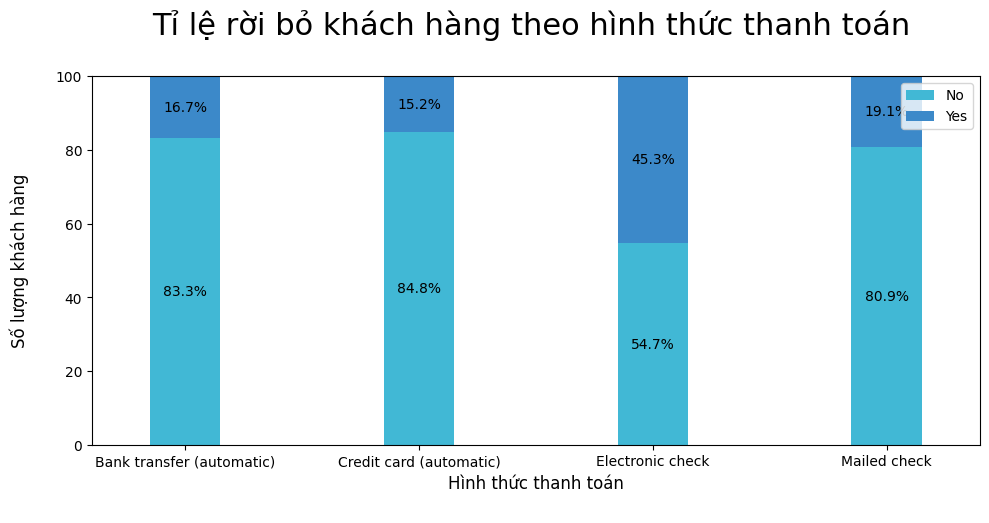

In [94]:
# Vẽ biểu đồ cột chồng cho tỷ lệ churn theo phương thức thanh toán
ax = (payment_churn.T * 100.0 / payment_churn.T.sum()).T.plot(kind='bar', stacked=True, color=['#41b8d5', '#3c89c9'], width=0.3, figsize=(10, 7))
# Thiết lập nhãn và tiêu đề cho biểu đồ
plt.ylabel('Số lượng khách hàng\n', fontsize="large")
plt.xlabel('Hình thức thanh toán\n', fontsize="large")
plt.title('Tỉ lệ rời bỏ khách hàng theo hình thức thanh toán \n', fontsize=22)
# Thiết lập trục y để hiển thị phần trăm (tăng giá trị y lên 100 lần)
ax.set_ylim(0, 100)
# Thêm tỷ lệ phần trăm vào các thanh trong biểu đồ
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, f'{p.get_height():.1f}%', 
            ha='center', va='center')
# Hiển thị biểu đồ
plt.legend(loc='upper right', fontsize="medium")
plt.tight_layout()
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

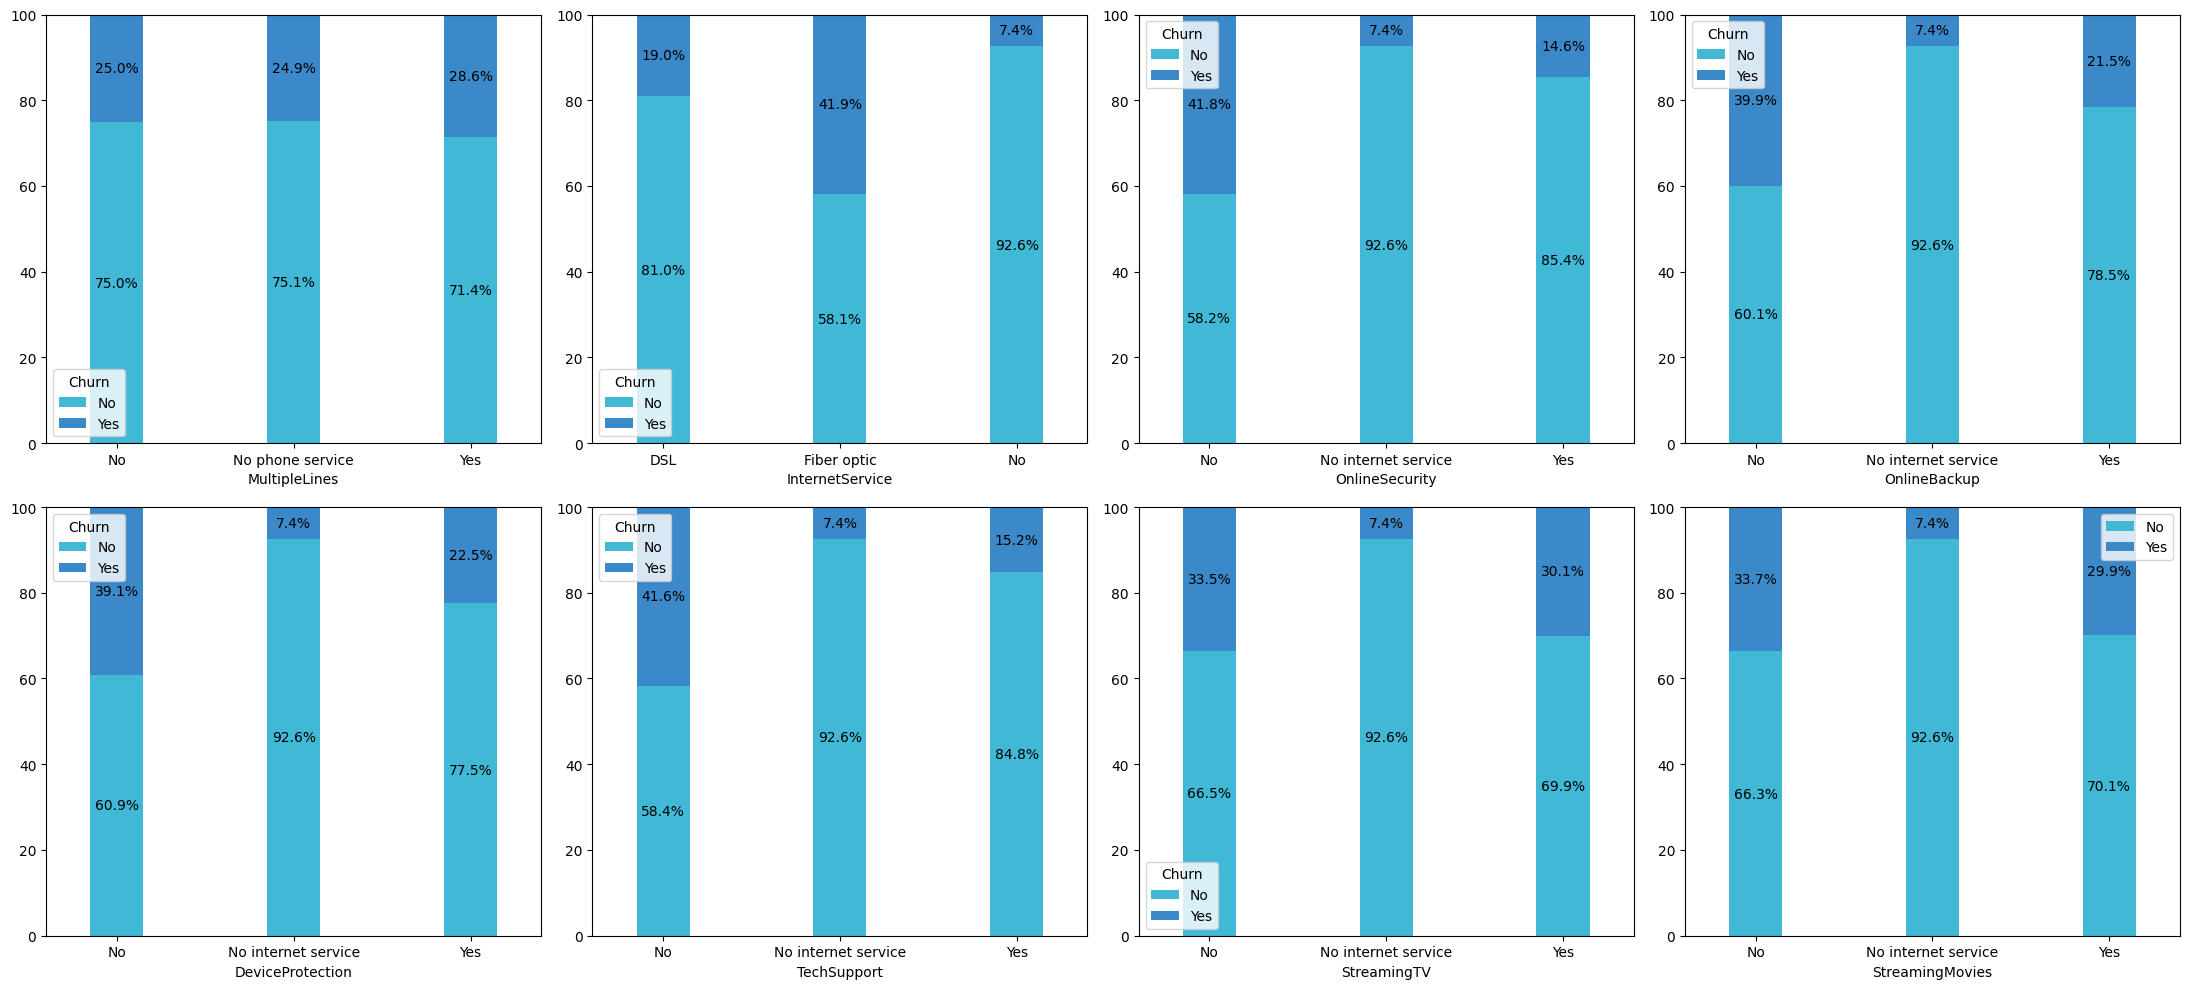

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
for i,item in enumerate(services):
    ax = axes.flatten()[i]
    temp=df.groupby([item, 'Churn']).size().unstack().rename(columns={0: 'No', 1: 'Yes'})
    temp = (temp.T * 100.0 / temp.T.sum()).T.plot(kind='bar', stacked=True, ax=ax,color=['#41b8d5', '#3c89c9'], width=0.3)
    for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, f'{p.get_height():.1f}%',  ha='center', va='center')
            ax.set_ylim(0, 100)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0, horizontalalignment='center')
# Hiển thị biểu đồ
plt.legend(loc='upper right', fontsize="medium")
plt.tight_layout()
plt.show()

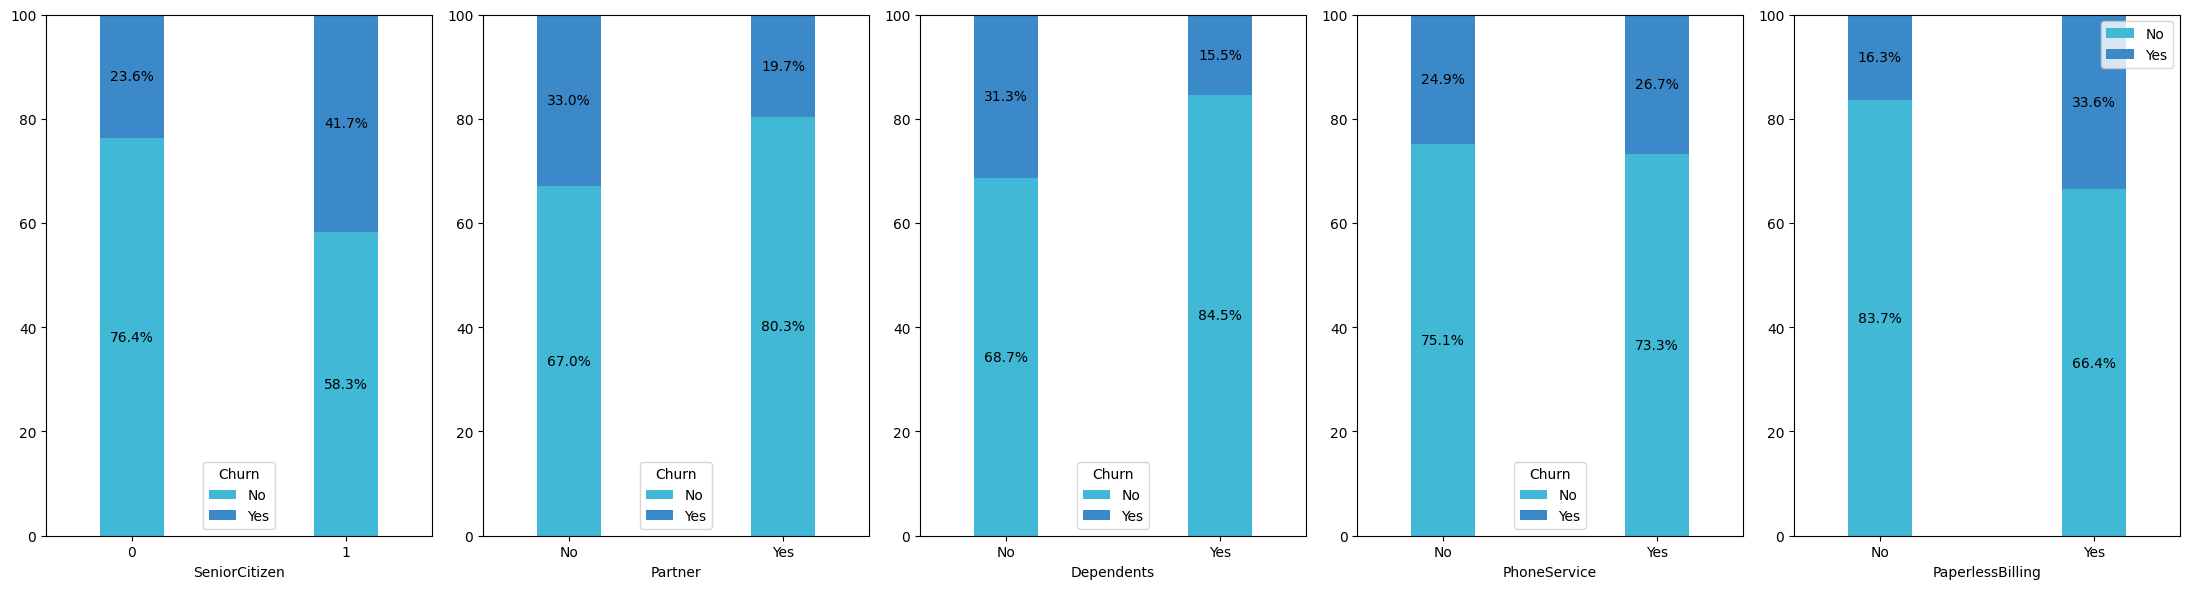

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 6))
for i,item in enumerate(ft):
    ax = axes.flatten()[i]
    temp=df.groupby([item, 'Churn']).size().unstack().rename(columns={0: 'No', 1: 'Yes'})
    temp = (temp.T * 100.0 / temp.T.sum()).T.plot(kind='bar', stacked=True, ax=ax,color=['#41b8d5', '#3c89c9'], width=0.3)
    for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, f'{p.get_height():.1f}%',  ha='center', va='center')
            ax.set_ylim(0, 100)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0, horizontalalignment='center')
# Hiển thị biểu đồ
plt.legend(loc='upper right', fontsize="medium")
plt.tight_layout()
plt.show()

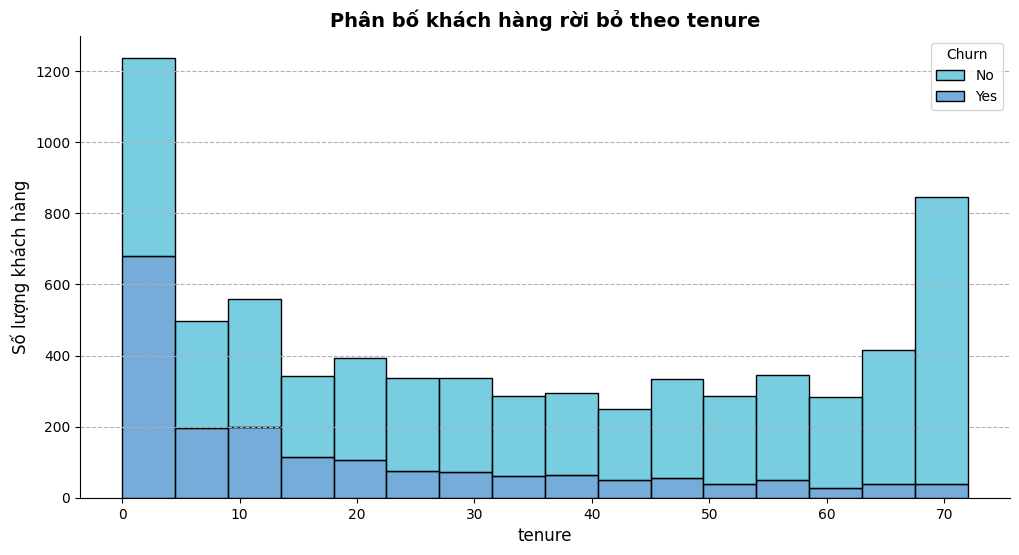

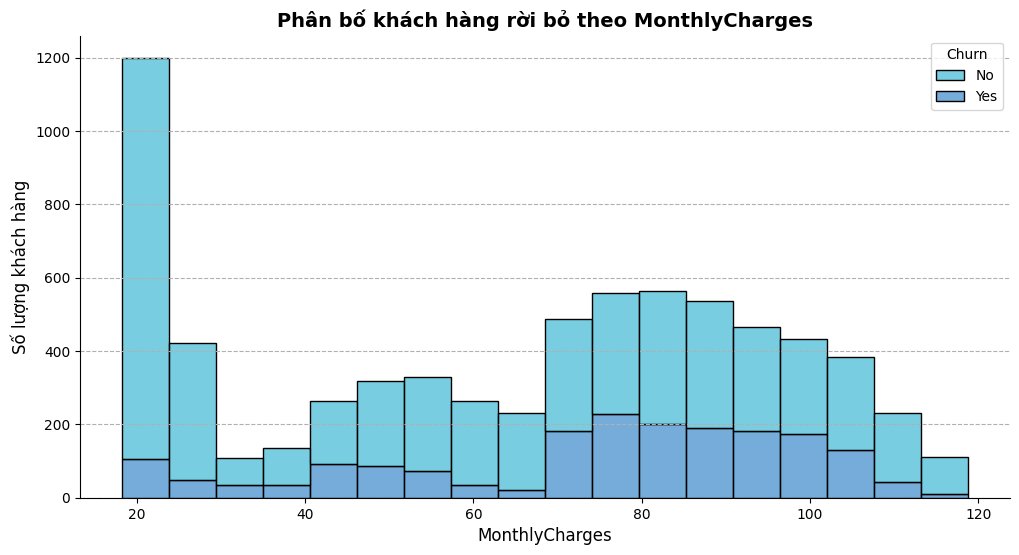

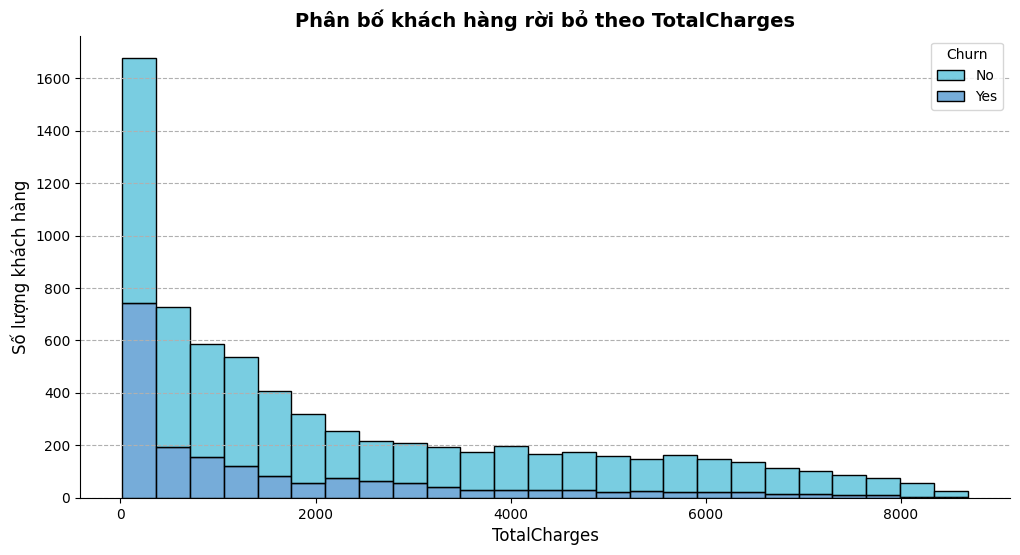

In [97]:
for col in ft1:
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=df,x=col, hue='Churn', kde=False, palette={'#41b8d5', '#3c89c9'},multiple='stack', stat='count',alpha=0.7 )
    ax.set_title(f'Phân bố khách hàng rời bỏ theo {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Số lượng khách hàng', fontsize=12)
    ax.grid(axis='y', linestyle='--')
    sns.despine(top=True, right=True)
    plt.show()

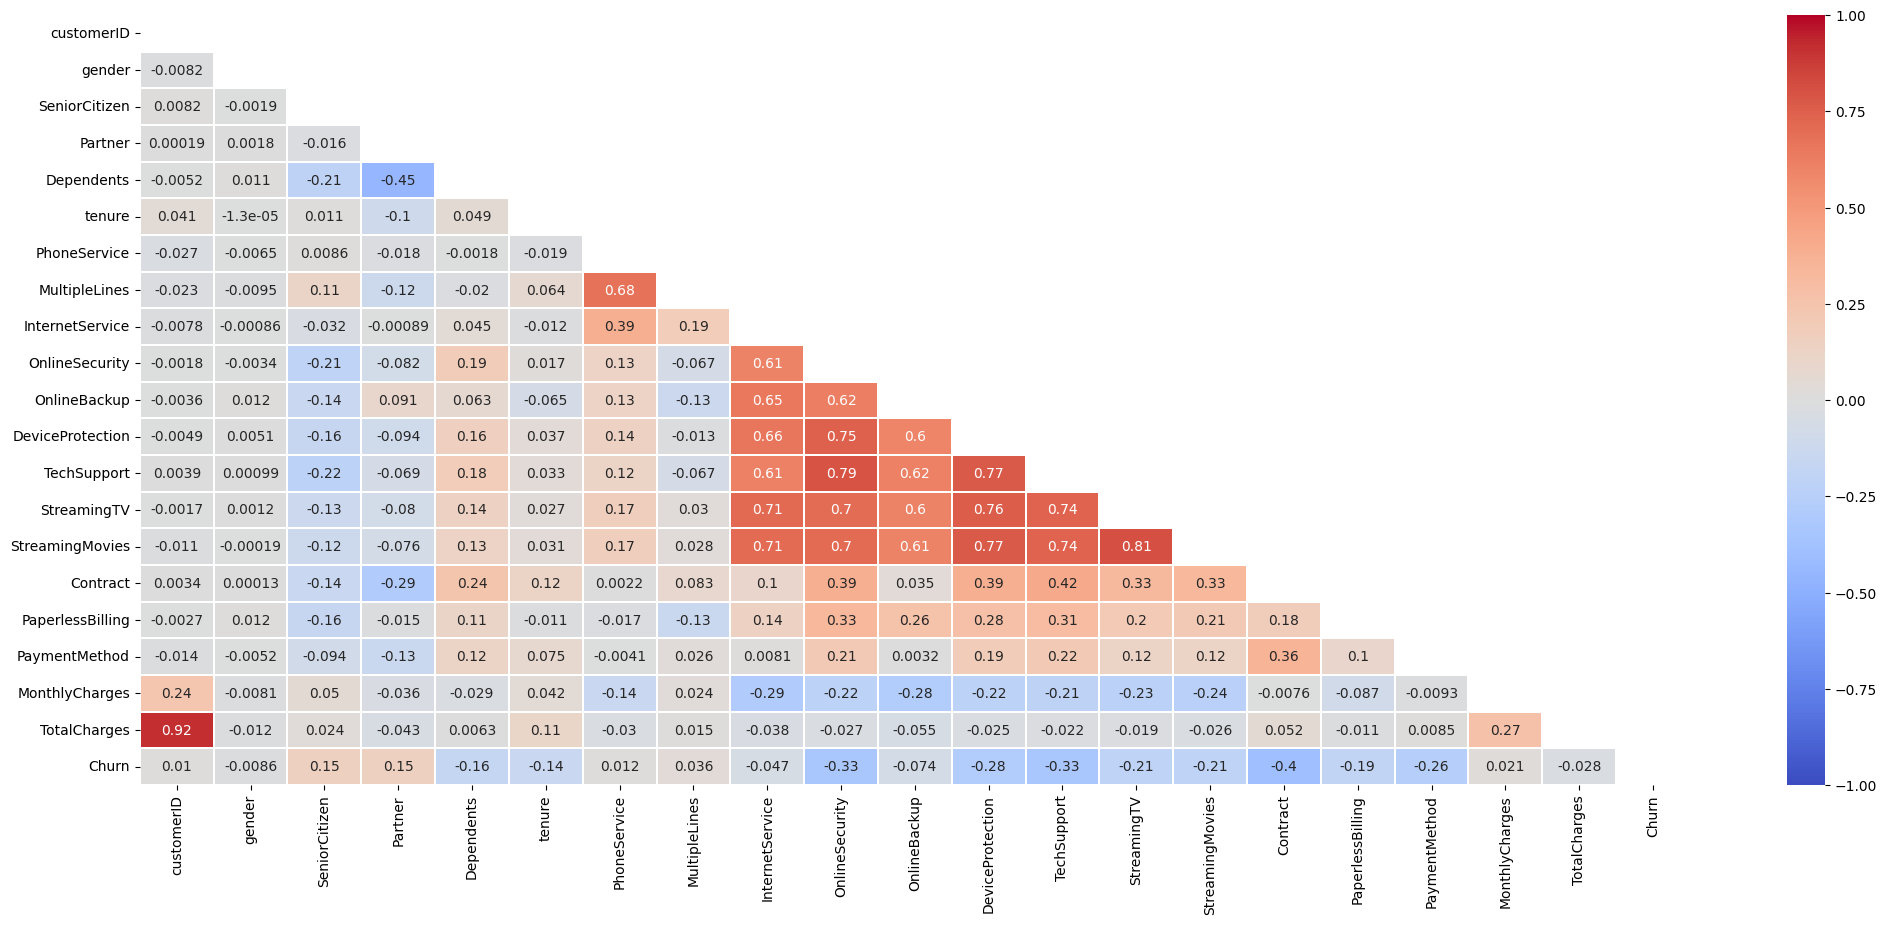

In [98]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [99]:
#kiểm tra mối tương quan của cột TotalCharges và tenure*MonthlyCharges
df['TotalCharges'].corr(df['tenure']*df['MonthlyCharges'])

np.float64(0.9987673485856696)

Nhận xét: Có mối quan hệ tuyến tính gần như hoàn hảo

Tiền xử lý dữ liệu để đưa vào mô hình

In [100]:
#Mã hóa dữ liệu
le = LabelEncoder()
columns_to_encode = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [101]:
# sử dụng chuẩn hóa bằng Min-Max Scaler
for col in services:
    df[col] = le.fit_transform(df[col])
    X_min = min(df[col])
    X_max = max(df[col])
    scaled_data = [(x - X_min) / (X_max - X_min) for x in df[col]]
    df[col] = scaled_data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0.5,0.0,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [102]:
#Mã hóa các cột contract,paymentmethod 
contract_payment=['Contract','PaymentMethod']
for col in contract_payment:
    df[col] = le.fit_transform(df[col])
    X_min = min(df[col])
    X_max = max(df[col])
    scaled_data = [(x - X_min) / (X_max - X_min) for x in df[col]]
    df[col] = scaled_data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.666667,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.5,0,1.000000,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,1.000000,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0.5,0.0,1.0,...,1.0,1.0,0.0,0.0,0.5,0,0.000000,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.666667,70.70,151.65,1


In [103]:
#Mã hóa cột gender
df['gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df.head(5)

C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\481861464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
C:\Users\tqdan\AppData\Local\Temp\ipykernel_11996\481861464.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].re

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.666667,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.5,0,1.000000,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,1.000000,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0.5,0.0,1.0,...,1.0,1.0,0.0,0.0,0.5,0,0.000000,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.666667,70.70,151.65,1


In [104]:
# Tách dữ liệu thành các biến đặc trưng (X) và biến mục tiêu (y)
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']
## Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Độ chính xác là:",accuracy_lr)

Độ chính xác là: 0.8112136266855926


C:\Users\tqdan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Độ chính xác là:",accuracy_dt)

Độ chính xác là: 0.7317246273953159


In [107]:
df.loc[(df['tenure']>=0) & (df['tenure']<=12),'NEW_TENURE_YEAR'] = "0-1 Year"
df.loc[(df['tenure']>12) & (df['tenure']<=24),'NEW_TENURE_YEAR'] = "1-2 Year"
df.loc[(df['tenure']>24) & (df['tenure']<=36),'NEW_TENURE_YEAR'] = "2-3 Year"
df.loc[(df['tenure']>36) & (df['tenure']<=48),'NEW_TENURE_YEAR'] = "3-4 Year"
df.loc[(df['tenure']>48) & (df['tenure']<=60),'NEW_TENURE_YEAR'] = "4-5 Year"
df.loc[(df['tenure']>60) & (df['tenure']<=72),'NEW_TENURE_YEAR'] = "5-6 Year"
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
0,7590-VHVEG,1,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.666667,29.85,29.85,0,0-1 Year
1,5575-GNVDE,0,0,0,0,34,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,0,1.000000,56.95,1889.50,0,2-3 Year
2,3668-QPYBK,0,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,1.000000,53.85,108.15,1,0-1 Year
3,7795-CFOCW,0,0,0,0,45,0,0.5,0.0,1.0,...,1.0,0.0,0.0,0.5,0,0.000000,42.30,1840.75,0,3-4 Year
4,9237-HQITU,1,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,1,0.666667,70.70,151.65,1,0-1 Year


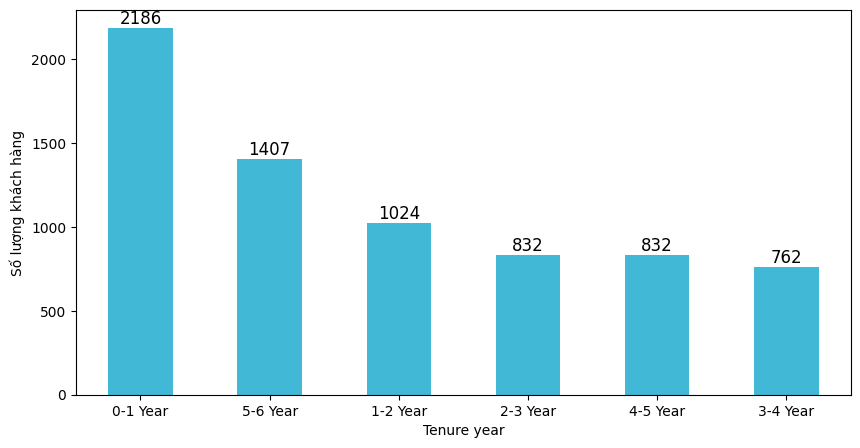

In [108]:
df.NEW_TENURE_YEAR.value_counts().plot(kind='bar', figsize=(10,5),color='#41b8d5')
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Tenure year')
for i in range(len(df.NEW_TENURE_YEAR.value_counts())):
     plt.text(i, df.NEW_TENURE_YEAR.value_counts().iloc[i] + 0.05,  
             f'{df.NEW_TENURE_YEAR.value_counts().iloc[i]}', 
             ha='center', va='bottom', fontsize=12) 
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

In [109]:
df['NEW_TENURE_YEAR'] = le.fit_transform(df['NEW_TENURE_YEAR'])
X_min = min(df['NEW_TENURE_YEAR'])
X_max = max(df['NEW_TENURE_YEAR'])
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['NEW_TENURE_YEAR']]
df['NEW_TENURE_YEAR'] = scaled_data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
0,7590-VHVEG,1,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.666667,29.85,29.85,0,0.0
1,5575-GNVDE,0,0,0,0,34,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,0,1.000000,56.95,1889.50,0,0.4
2,3668-QPYBK,0,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,1.000000,53.85,108.15,1,0.0
3,7795-CFOCW,0,0,0,0,45,0,0.5,0.0,1.0,...,1.0,0.0,0.0,0.5,0,0.000000,42.30,1840.75,0,0.6
4,9237-HQITU,1,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,1,0.666667,70.70,151.65,1,0.0


In [110]:
scaler_minmax = MinMaxScaler()
df[['monthly_scaled']] = scaler_minmax.fit_transform(df[['MonthlyCharges']])
df[['totalcharges_scaled_minmax']] = scaler_minmax.fit_transform(df[['TotalCharges']])
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,monthly_scaled,totalcharges_scaled_minmax
0,7590-VHVEG,1,0,1,0,1,0,0.5,0.0,0.0,...,0.0,0.0,1,0.666667,29.85,29.85,0,0.0,0.115423,0.001275
1,5575-GNVDE,0,0,0,0,34,1,0.0,0.0,1.0,...,0.0,0.5,0,1.000000,56.95,1889.50,0,0.4,0.385075,0.215867
2,3668-QPYBK,0,0,0,0,2,1,0.0,0.0,1.0,...,0.0,0.0,1,1.000000,53.85,108.15,1,0.0,0.354229,0.010310
3,7795-CFOCW,0,0,0,0,45,0,0.5,0.0,1.0,...,0.0,0.5,0,0.000000,42.30,1840.75,0,0.6,0.239303,0.210241
4,9237-HQITU,1,0,0,0,2,1,0.0,0.5,0.0,...,0.0,0.0,1,0.666667,70.70,151.65,1,0.0,0.521891,0.015330


In [111]:
# Tách dữ liệu thành các biến đặc trưng (X) và biến mục tiêu (y)
X = df.drop(['Churn','customerID','tenure','MonthlyCharges','TotalCharges'], axis=1)
y = df['Churn']
## Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Độ chính xác là:",accuracy_lr)

Độ chính xác là: 0.8161816891412349


In [113]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



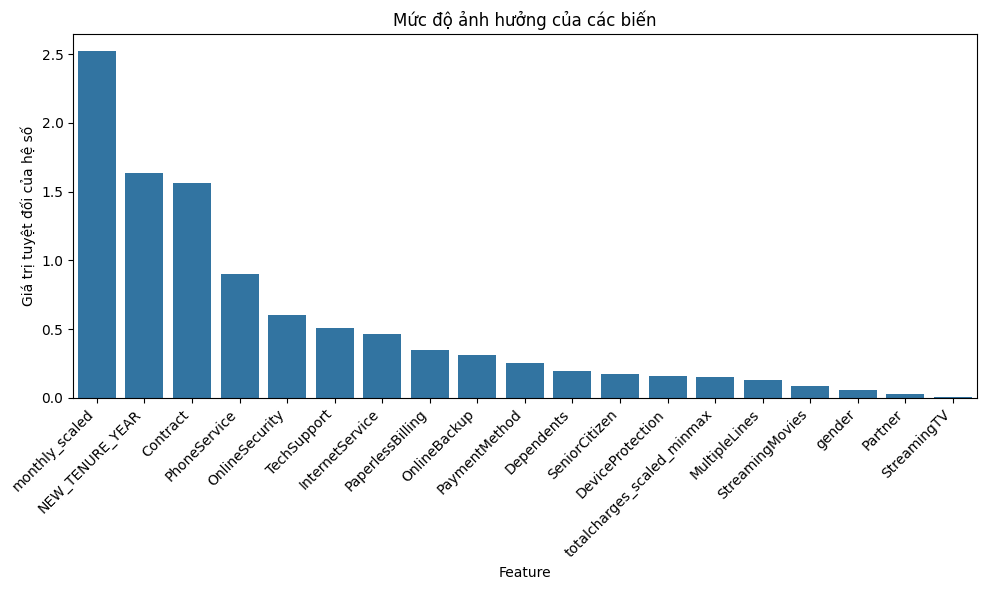

In [114]:
# Lấy hệ số (coefficients)
coefficients = lr_model.coef_[0]
# Tạo DataFrame để dễ dàng xử lý và vẽ biểu đồ
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
# Vẽ biểu đồ cột giá trị tuyệt đối của hệ số
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Abs_Coefficient', data=coef_df)
plt.ylabel("Giá trị tuyệt đối của hệ số")
plt.title("Mức độ ảnh hưởng của các biến")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

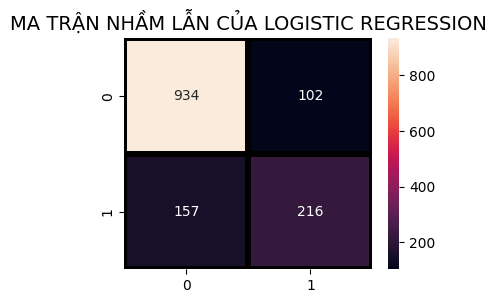

In [115]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("MA TRẬN NHẦM LẪN CỦA LOGISTIC REGRESSION",fontsize=14)
plt.show()

In [116]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Độ chính xác là:",accuracy_dt)

Độ chính xác là: 0.7196593328601846


In [117]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



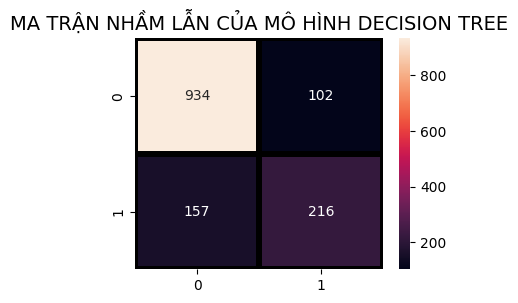

In [118]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("MA TRẬN NHẦM LẪN CỦA MÔ HÌNH DECISION TREE",fontsize=14)
plt.show()